# Proyecto - Telecomunicaciones CHURN Analisis

### (1) Recolección de Datos

#### (1.1) Importamos las librerias necesarias y el Data Frame CHURN

In [95]:
# Librerias
import numpy as np              # Algebra Lineal
import pandas as pd             # Procesamiento de datos
import matplotlib.pyplot as plt # Visualización
import seaborn as sns           # Visualización

# Importamos la base de datos Telco-Churn
dfChurn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')

#### (1.2) Imprimimos los 5 primeros datos del Data Frame

In [98]:
dfChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### (2) Pre-Procesamiento

#### (2.1) Vista General del Data Frame

In [99]:
print ("Data Frame CHURN\n (Filas, Columnas)  : " ,dfChurn.shape)
print ("\nVariables  :\n" ,dfChurn.columns.tolist())
print ("\nValores Perdidos  :  ", dfChurn.isnull().sum().values.sum())
print ("\nValores Unicos  :  \n",dfChurn.nunique())

Data Frame CHURN
 (Filas, Columnas)  :  (7043, 21)

Variables  :
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Valores Perdidos  :   0

Valores Unicos  :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


#### (2.2) Limpieza de Datos

In [105]:
# Haremos los siguientes cambios para la variable "TotalCharges"
# Remplazo de Cadenas Vacias por NaNs
dfChurn['TotalCharges'] = dfChurn["TotalCharges"].replace(" ",np.nan)
# Quitamos los NaNs del Data Frame
dfChurn = dfChurn[dfChurn["TotalCharges"].notnull()]
dfChurn = dfChurn.reset_index()[dfChurn.columns]
# Convertimos la variable a tipo float
dfChurn["TotalCharges"] = dfChurn["TotalCharges"].astype(float)

# En la variable "SeniorCitizen" hacemos una recodificación de la variable
dfChurn["SeniorCitizen"] = dfChurn["SeniorCitizen"].replace({1:"Yes",0:"No"})

# Generamos una funcion para codificar de manera categorica la variable "Tenure"
def tenure_cat(dfChurn) :    
    if dfChurn["tenure"] <= 12 :
        return "(0-12)"
    elif (dfChurn["tenure"] > 12) & (dfChurn["tenure"] <= 24 ):
        return "(12-24)"
    elif (dfChurn["tenure"] > 24) & (dfChurn["tenure"] <= 48) :
        return "(24-48)"
    elif (dfChurn["tenure"] > 48) & (dfChurn["tenure"] <= 60) :
        return "(48-60)"
    elif dfChurn["tenure"] > 60 :
        return "(+60)"
# Creamos la variable "tenure_cat" usando la función de que codifica la data de la variable "tenure"
dfChurn["tenure_cat"] = dfChurn.apply(lambda dfChurn:tenure_cat(dfChurn),
                                      axis = 1)

# Remplazamos la etiqueta "No internet service" por "No" para las siguientes variables
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    dfChurn[i]  = dfChurn[i].replace({'No internet service' : 'No'})

### (3) Extracción de Caracteristicas

#### (3.1) Analisis Exploratorio - Variables Categoricas ___(NoChurn, Churn, Total)___
Graficaremos cada un de las variables categoricas cortada por No Churn vs Churn vs Total de la base

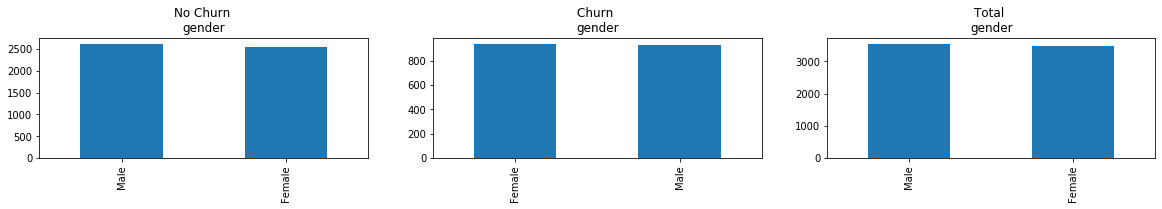

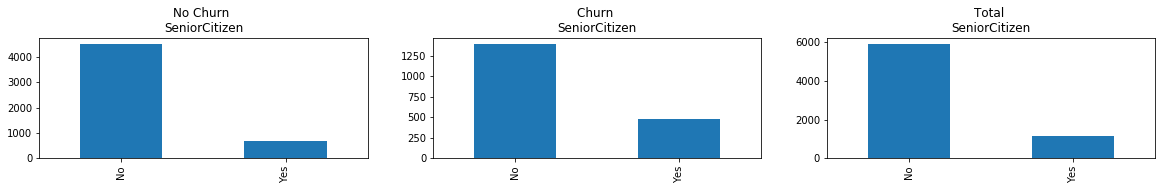

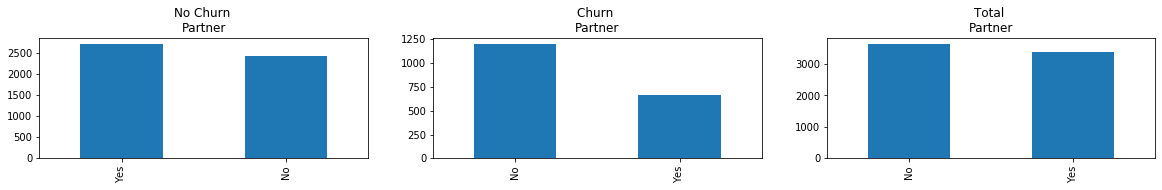

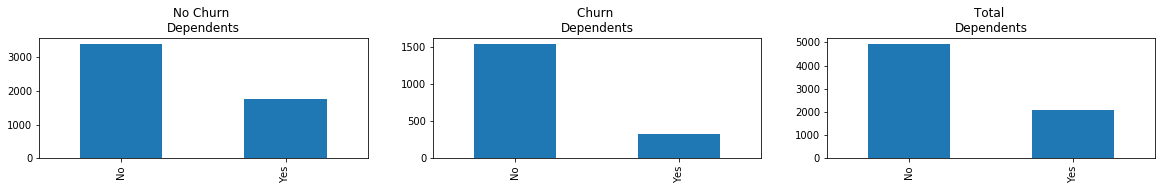

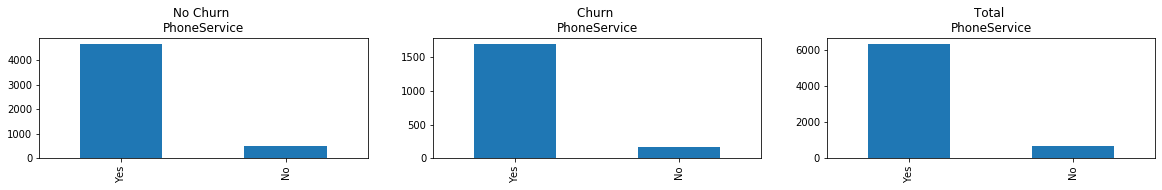

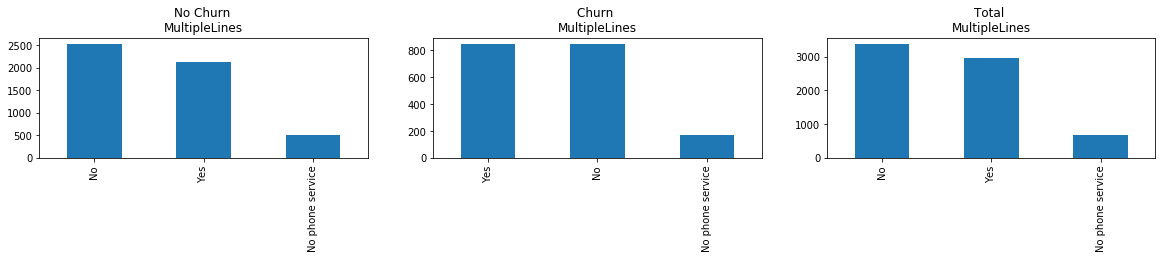

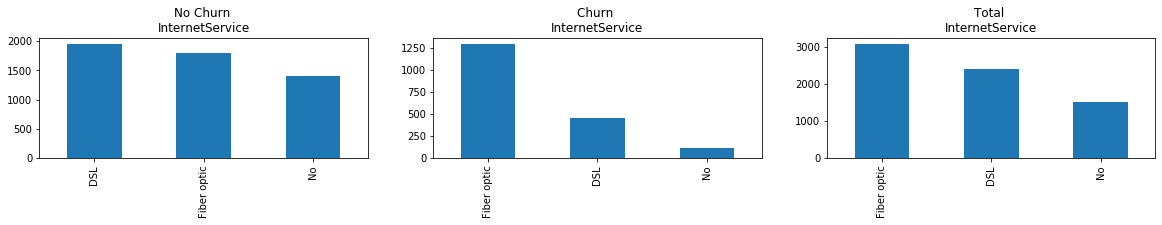

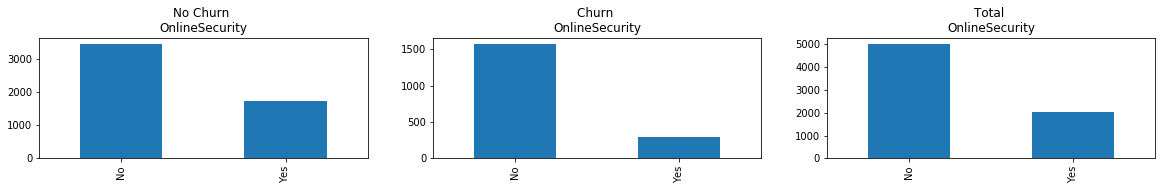

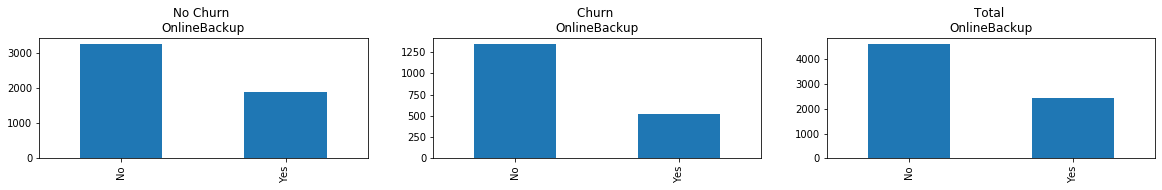

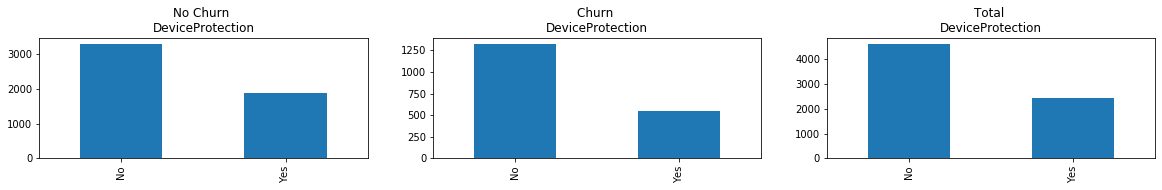

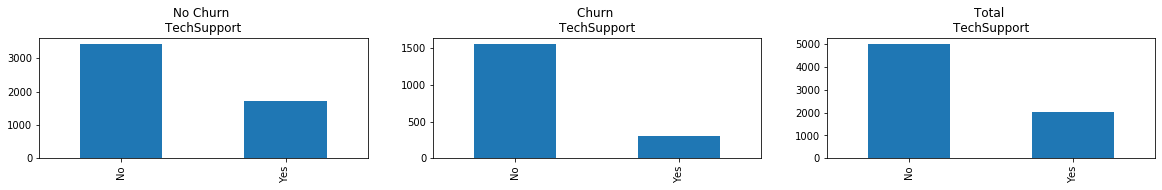

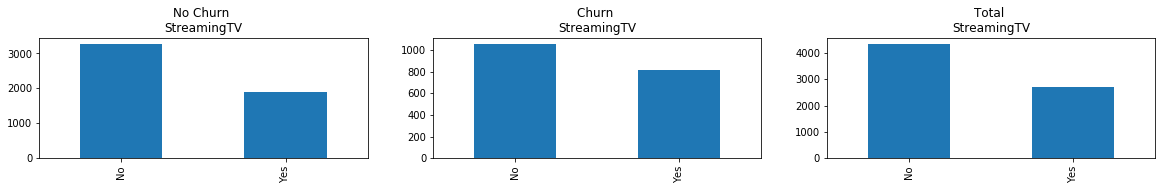

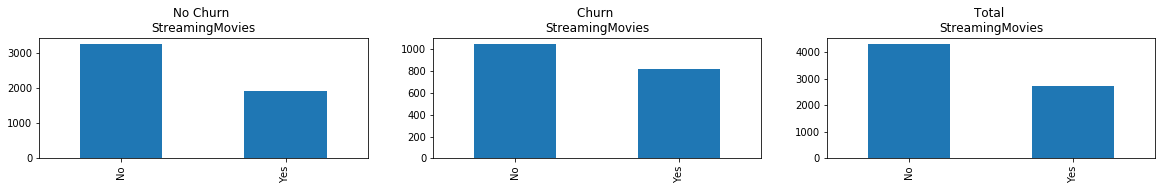

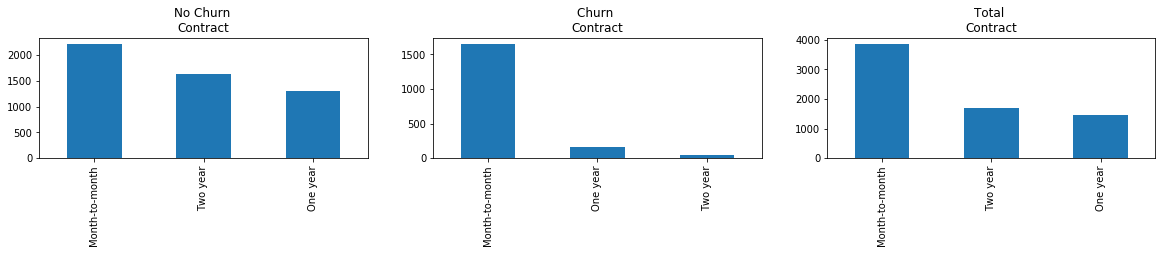

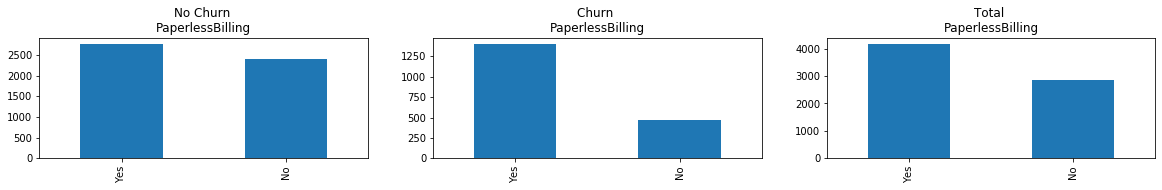

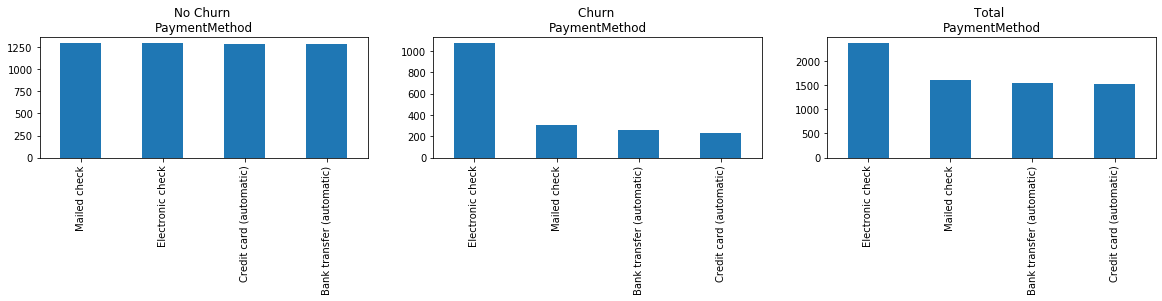

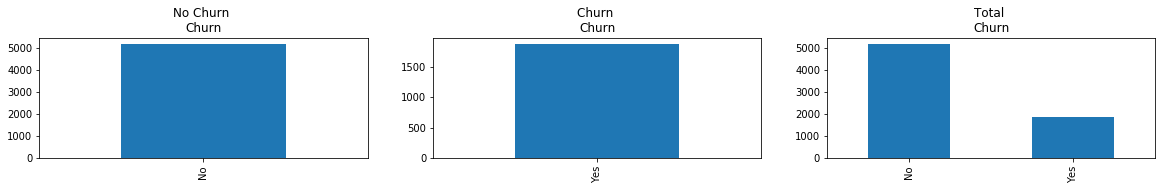

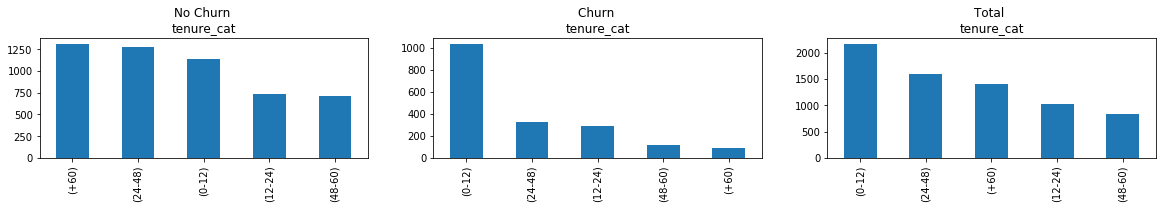

In [82]:
# Generamos una base solo con variables Categoricas
strColumns = dfChurn.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)

# Generamos un loop que nos pinte todas las graficas de las variables categoricas
for i in range(1,strColumns.shape[1]):
    
    rows = strColumns.shape[1]
    cols = 3
    plt.rcParams["figure.figsize"] = (20,50)
    
    # Generamos las graficas para No Churn
    strVarNoChurn = strColumns[strColumns["Churn"] == "No"].iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols - 2))
    strVarNoChurn.plot(kind='bar')
    plt.title("No Churn \n" + strVarNoChurn.name)
    
    # Generamos las graficas para Churn
    strVarChurn = strColumns[strColumns["Churn"] == "Yes"].iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols - 1))
    strVarChurn.plot(kind='bar')
    plt.title("Churn \n" + strVarChurn.name)
    
    # Generamos las graficas para Total
    strVarTot = strColumns.iloc[: ,i].value_counts()
    plt.subplot(rows,cols,(i * cols))
    strVarTot.plot(kind='bar')
    plt.title("Total \n" + strVarTot.name)

    plt.show()


#### (3.2) Analisis Exploratorio - Variables Continuas ___(NoChurn, Churn, Total)___
Generaremos una tabla descriptiva de cada un de las variables continuas cortada por No Churn vs Churn vs Total de la base

In [93]:
print('\n No Churn: \n',
      dfChurn[dfChurn["Churn"] == "No"][['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print('\n Churn: \n',
      dfChurn[dfChurn["Churn"] == "Yes"][['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
print('\n Total: \n',
      dfChurn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())




 No Churn: 
            tenure  MonthlyCharges  TotalCharges
count  5163.00000     5163.000000   5163.000000
mean     37.65001       61.307408   2555.344141
std      24.07694       31.094557   2329.456984
min       1.00000       18.250000     18.800000
25%      15.00000       25.100000    577.825000
50%      38.00000       64.450000   1683.600000
75%      61.00000       88.475000   4264.125000
max      72.00000      118.750000   8672.450000

 Churn: 
             tenure  MonthlyCharges  TotalCharges
count  1869.000000     1869.000000   1869.000000
mean     17.979133       74.441332   1531.796094
std      19.531123       24.666053   1890.822994
min       1.000000       18.850000     18.850000
25%       2.000000       56.150000    134.500000
50%      10.000000       79.650000    703.550000
75%      29.000000       94.200000   2331.300000
max      72.000000      118.350000   8684.800000

 Total: 
             tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.

### (4) Selección de Caracteristicas

### (5) Creación de Modelos

### (6) Evaluación de Modelos

###### [Telecom Customer Churn Prediction Notebook](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)